In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
np.set_printoptions(suppress=True)
import deepl_model
import seaborn as sns
import pandas as pd
import matplotlib as mpl
mpl.rcParams['font.size'] = 17.0
from tensorflow import lite

## Load Data

In [2]:
import deepl_data_preproc

In [3]:
CSV_DATA_PATH = "../data/downloaded_data/data.csv"

In [4]:
X, y = deepl_data_preproc.read_full_data_n_preproc(data_csv_path=CSV_DATA_PATH, verbose=True )

Splitting X and y of shapes (994000, 6) and (994000, 4)
============== Data Info. ==============
=> Read CSV with 994000 entries
=> Input/X data has shape  (4970, 200, 6)
=> Output/y data has shape  (4970, 4)


## Use the Deep Learning Model

In [5]:
import deepl_model

In [6]:
model = deepl_model.DLModel(model_name="DeploymentModel")
model.model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input-Layer (InputLayer)     [(None, 200, 6, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1229824   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832 

### Fitting the training data

In [7]:
model.train_full_data(X, y, epochs=60, batch_size=16)

Epoch 1/60
311/311 [==============================] - 4s 8ms/step - loss: 0.6686 - accuracy: 0.7326
Epoch 2/60
311/311 [==============================] - 2s 7ms/step - loss: 0.3991 - accuracy: 0.8608
Epoch 3/60
311/311 [==============================] - 3s 8ms/step - loss: 0.3178 - accuracy: 0.8905
Epoch 4/60
311/311 [==============================] - 3s 8ms/step - loss: 0.2878 - accuracy: 0.9004
Epoch 5/60
311/311 [==============================] - 3s 9ms/step - loss: 0.2465 - accuracy: 0.9119
Epoch 6/60
311/311 [==============================] - 3s 9ms/step - loss: 0.2347 - accuracy: 0.9223
Epoch 7/60
311/311 [==============================] - 2s 8ms/step - loss: 0.2228 - accuracy: 0.9227
Epoch 8/60
311/311 [==============================] - 3s 8ms/step - loss: 0.2101 - accuracy: 0.9328
Epoch 9/60
311/311 [==============================] - 3s 11ms/step - loss: 0.1863 - accuracy: 0.9382
Epoch 10/60
311/311 [==============================] - 3s 10ms/step - loss: 0.1880 - accuracy: 0.93

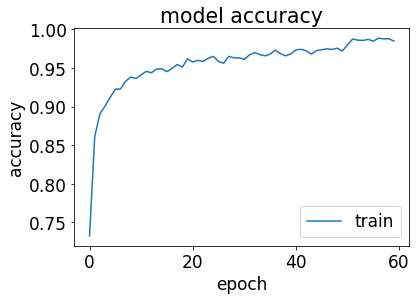

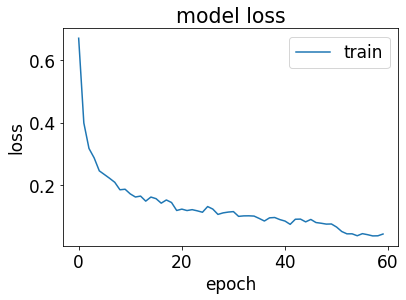

In [8]:
model.plot_full_training_history()
model.save()

## Convert keras model to Tensorlite

In [9]:
keras_file_path = model.model_save_path

converter = lite.TFLiteConverter.from_keras_model(model.model)
tflite_model = converter.convert()

open(f"{model.model_name}.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\badns\AppData\Local\Temp\tmpdkpeqhhq\assets


INFO:tensorflow:Assets written to: C:\Users\badns\AppData\Local\Temp\tmpdkpeqhhq\assets


7153240